# SPACE SCIENCE: Meteorite Landings Exploratory Data Analysis

In this notebook, an EDA is performed on NASA Meteorite Landings data set derived from NASA's Open Data Portal.
This comprehensive data set from The Meteoritical Society contains information on all of the known meteorite landings.

The crux of this EDA is to find the realtion between mass, year, recclass and GeoLocation. 
The language is Python.

### 1. Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### 2. Pull data by reading from the csv file that is downloaded from NASA's Open Data Portal (https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh)

In [2]:
df = pd.read_csv("meteorite_landings.csv")
display(df)
df.info()
df.shape

# Finds the number of nulls in the columns
print(df.isnull().sum())

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB
name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64


### 3. Organize the data set by filling the null values

In [3]:
# Organize the dataset

df = df.fillna(0)
df.head(5)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


### 4. Investigate the distributions and outlier points

(array([1.66608336e-07, 1.45827865e-11, 7.29139324e-12, 7.29139324e-12,
        1.45827865e-11, 3.64569662e-12, 0.00000000e+00, 0.00000000e+00,
        3.64569662e-12, 7.29139324e-12]),
 array([       0.,  6000000., 12000000., 18000000., 24000000., 30000000.,
        36000000., 42000000., 48000000., 54000000., 60000000.]),
 <BarContainer object of 10 artists>)

<Figure size 1080x360 with 0 Axes>

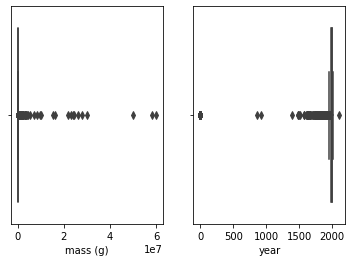

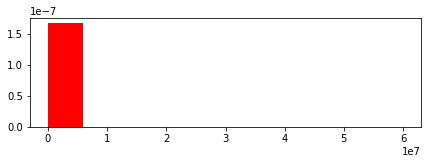

In [4]:
#Investigate the Mass Distribution and outliers
plt.figure(figsize=(15,5))
fig, ax =plt.subplots(1,2)
sns.boxplot(df[r"mass (g)"], ax=ax[0])
sns.boxplot(df["year"], ax=ax[1])

plt.figure(figsize=(7,2))
plt.hist(df[r"mass (g)"], color='red', density=True, histtype='barstacked')

### 5. Investigate the relationships

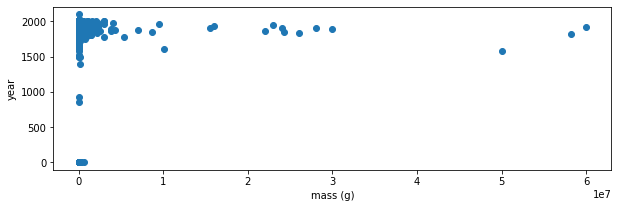

In [5]:
#Investigate the bilateral relations betweeen mass & year and mass & x-y axis
fig, ax = plt.subplots(figsize=(10,3))
ax.scatter(df[r"mass (g)"], df["year"])
ax.set_xlabel('mass (g)')
ax.set_ylabel('year')
plt.show()

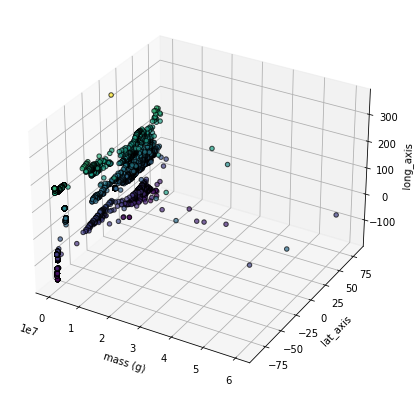

In [6]:
fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(df[r"mass (g)"], df["reclat"], df["reclong"],
           linewidths=1, alpha=.7,
           edgecolor='k',
           c=df["reclong"])
ax.set_xlabel('mass (g)')
ax.set_ylabel('lat_axis')
ax.set_zlabel("long_axis")
plt.show()

### 6. Skewness

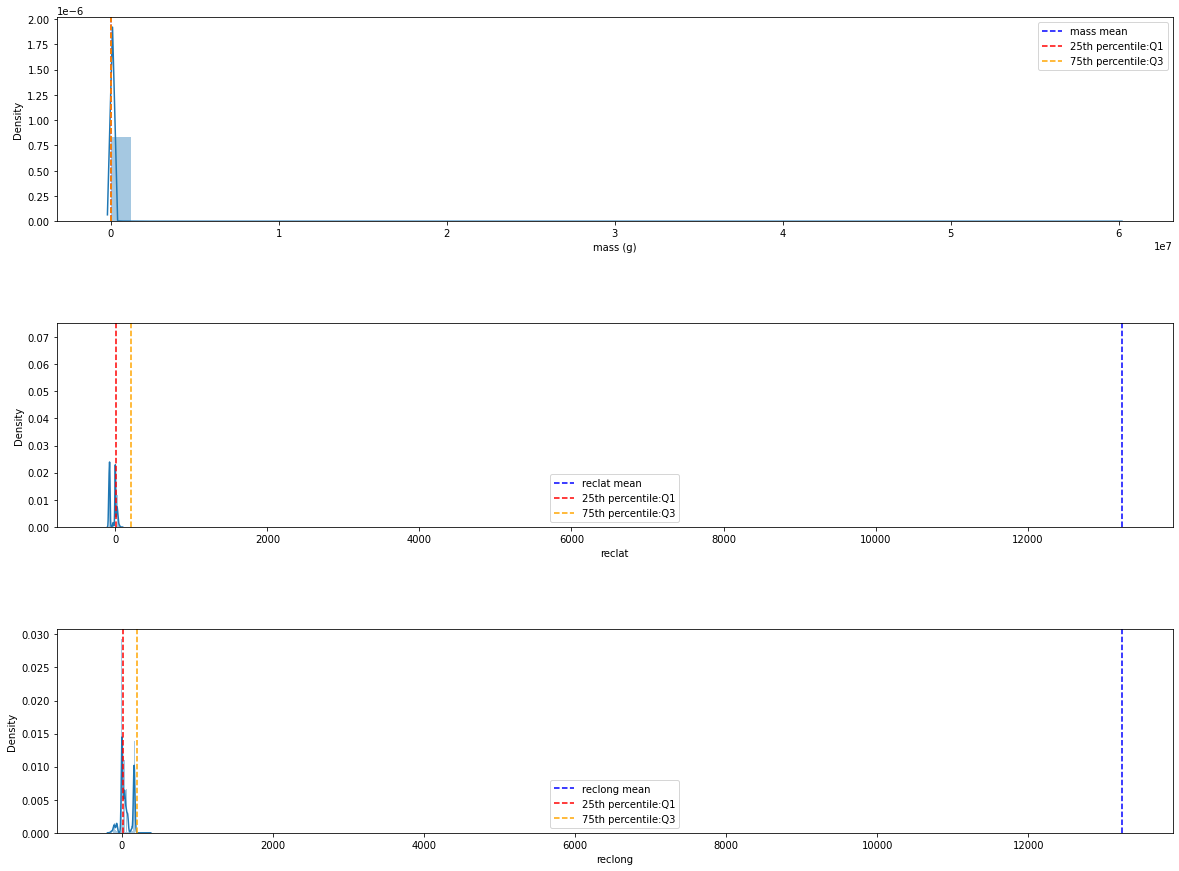

In [7]:
fig = plt.figure(figsize=(20, 15))

plt.subplot(3,1,1)
sns.distplot(df[r"mass (g)"])
plt.axvline(x=np.mean(df[r"mass (g)"]), c='blue', ls='--', label='mass mean')
plt.axvline(x=np.percentile(df[r"mass (g)"],25),c='red', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df[r"mass (g)"],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

plt.subplot(3,1,2)
sns.distplot(df["reclat"])
plt.axvline(x=np.mean(df[r"mass (g)"]), c='blue', ls='--', label='reclat mean')
plt.axvline(x=np.percentile(df[r"mass (g)"],25),c='red', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df[r"mass (g)"],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

plt.subplot(3,1,3)
sns.distplot(df["reclong"])
plt.axvline(x=np.mean(df[r"mass (g)"]), c='blue', ls='--', label='reclong mean')
plt.axvline(x=np.percentile(df[r"mass (g)"],25),c='red', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df[r"mass (g)"],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()
plt.subplots_adjust(hspace=0.5)

### 6. Investigate difference over years

2003.0    3323
1979.0    3046
1998.0    2697
2006.0    2456
1988.0    2296
          ... 
1741.0       1
1519.0       1
1671.0       1
1779.0       1
1792.0       1
Name: year, Length: 266, dtype: int64

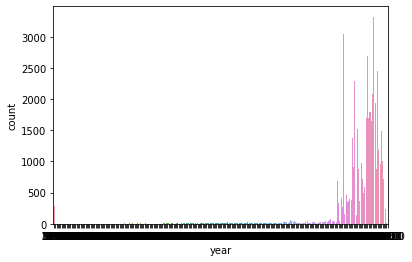

In [8]:
sns.countplot(df['year'])
df['year'].value_counts()

### 8. Bi-variate analysis between mass & year

<AxesSubplot:xlabel='mass (g)', ylabel='year'>

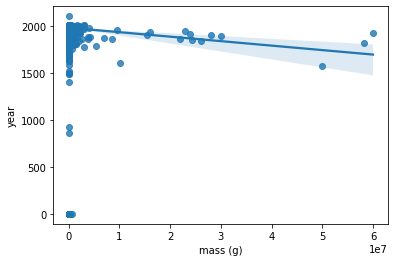

In [9]:
sns.regplot(df[r'mass (g)'], df['year'])

### 9. Distribution of mass over recclass info

<AxesSubplot:xlabel='recclass', ylabel='mass (g)'>

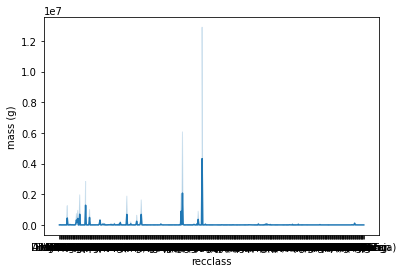

In [10]:
sns.lineplot(x= df['recclass'], 
             y = df.groupby(df.index).mean()[r'mass (g)'])

### 10. Understand the correlation with heatmap

<AxesSubplot:>

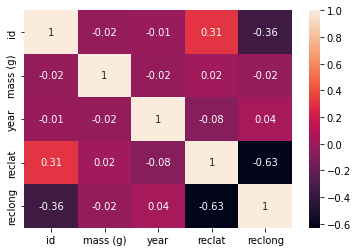

In [11]:
sns.heatmap(np.round(df.corr(),2), annot=True)

### 11. Recclass vs Mass

(array([       0.,  2000000.,  4000000.,  6000000.,  8000000., 10000000.,
        12000000., 14000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

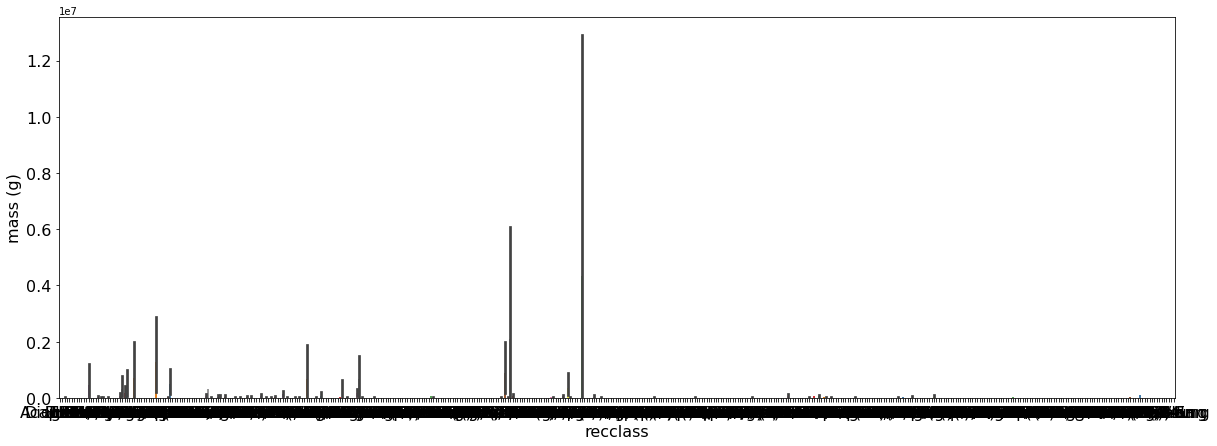

In [12]:
plt.figure(figsize=(20,7))
sns.barplot(df['recclass'],df[r'mass (g)'],palette='Set1')
plt.xlabel('recclass',fontsize='16')
plt.xticks(fontsize='16')
plt.ylabel(r'mass (g)',fontsize='16')
plt.yticks(fontsize='16')

### 12. Top 10 Recclasses according to the mean of the mass

In [13]:
recclass = df['recclass'].value_counts()
n = recclass.nlargest(10)

mass = df[r'mass (g)']
grouped = mass.groupby(df['recclass'])
final = grouped.mean().nlargest(10)

print(final)

recclass
Iron, IVB            4.322833e+06
Iron, IIIE           2.076114e+06
Iron, IAB-MG         1.286053e+06
Iron, IC             8.925563e+05
Mesosiderite-A1      6.982063e+05
Iron, IAB-ung        6.860050e+05
Pallasite, PMG-an    6.853589e+05
Iron, IIIAB          4.870908e+05
Iron, IVA            4.501094e+05
Iron, ungrouped      4.221594e+05
Name: mass (g), dtype: float64


### 13. Correlation between mass and GeoLocation

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['mass_normalized'] = scaler.fit_transform(df[r'mass (g)'].values.reshape(-1,1))
df['reclat_normalized'] = scaler.fit_transform(df['reclat'].values.reshape(-1,1))
df['reclong_normalized'] = scaler.fit_transform(df['reclong'].values.reshape(-1,1))

features = ['mass_normalized','reclat_normalized','reclong_normalized']

fig = plt.figure()
df[features].corr()

,mass_normalized,reclat_normalized,reclong_normalized
mass_normalized,1.000000,0.024384,-0.018206
reclat_normalized,0.024384,1.000000,-0.629112
reclong_normalized,-0.018206,-0.629112,1.000000


<Figure size 432x288 with 0 Axes>